# Hierarchical Bayesian Ranking

TODO:
- incorporate budget

# Get the data

## Statcast data

In [1]:
import pandas as pd
date_range = pd.date_range('2018-03-29', pd.datetime.today()).strftime('%Y-%m-%d')

In [ ]:
# import pybaseball
# from concurrent.futures import ThreadPoolExecutor, as_completed

# results = []
# errors = []
# with ThreadPoolExecutor() as executor:
#     futures = {executor.submit(pybaseball.statcast, date): date for date in date_range}
#     for future in as_completed(futures):
#         try:
#             results.append(future.result())
#         except Exception as err:
#             errors.append(err)
#             print(f'could not get data for data {futures[future]}')

In [ ]:
# df = pd.concat(results)
# df.shape

In [ ]:
# df.to_csv(f'statcast-{pd.datetime.today().strftime("%Y-%m-%d")}.csv', index=False)

In [3]:
df = pd.read_csv("statcast-2018-09-19.csv")

In [4]:
d = df.groupby([
    'game_date', 'home_team', 'away_team', 
], as_index=False)[['post_away_score', 'post_home_score']].max()

In [5]:
d.shape

(2235, 5)

In [6]:
team_ids = {team: i for i, team in enumerate(d.home_team.unique())}
n_teams = len(team_ids)
team_ids

{'ARI': 0,
 'ATL': 1,
 'BAL': 2,
 'BOS': 21,
 'CHC': 29,
 'CIN': 13,
 'CLE': 27,
 'COL': 28,
 'CWS': 22,
 'DET': 14,
 'HOU': 15,
 'KC': 3,
 'LAA': 16,
 'LAD': 4,
 'MIA': 5,
 'MIL': 17,
 'MIN': 23,
 'NYM': 6,
 'NYY': 19,
 'OAK': 7,
 'PHI': 24,
 'PIT': 18,
 'SD': 8,
 'SEA': 9,
 'SF': 20,
 'STL': 25,
 'TB': 10,
 'TEX': 11,
 'TOR': 12,
 'WSH': 26}

In [7]:
import numpy as np
d['home_team_id'] = d.home_team.map(team_ids)
d['away_team_id'] = d.away_team.map(team_ids)
d['home_team_win'] = np.where(d.post_home_score > d.post_away_score, 1, 0)
d['away_team_win'] = np.where(d.post_home_score < d.post_away_score, 1, 0)

## Standings

In [8]:
import requests as rq
import pandas as pd
response = rq.get('https://projects.fivethirtyeight.com/2018-mlb-predictions/')
standings = pd.read_html(response.content)[0]

In [9]:
standings

,Unnamed: 0_level_0,Avg. Simulated SeasonAvg. Simulation,Postseason Chances,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Team▲▼,Division▲▼,Team rating▲▼,1-Week Change▲▼,RecordProj.rec.▲▼,Run Diff.▲▼,Make PlayoffsMakePlay-offs▲▼,WinDivisionWinDiv.▲▼,Win World SeriesWinW.S.▲▼
0,Astros95-56Astros,AL West,1601,1,102-60,269,>99%,>99%,24%
1,Red Sox103-48Red Sox,AL East,1590,-3,110-52,233,✓,>99%,25%
2,Dodgers84-68Dodgers,NL West,1567,12,90-72,164,92%,86%,15%
3,Yankees92-58Yankees,AL East,1561,-2,98-64,162,>99%,<1%,6%
4,Athletics90-61Athletics,AL West,1557,-4,96-66,112,98%,<1%,3%
5,Indians84-66Indians,AL Central,1555,-2,91-71,165,✓,✓,6%
6,Cubs89-62Cubs,NL Central,1552,4,95-67,130,>99%,95%,10%
7,Rays85-66Rays,AL East,1550,10,91-71,85,3%,—,<1%
8,Cardinals84-69Cardinals,NL Central,1541,-3,89-73,79,71%,<1%,3%


In [10]:
team_name_map = {
    'Diamondbacks': 'ARI',
    'Braves': 'ATL',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Angels': 'LAA',
    'Cubs': 'CHC',
    'White Sox': 'CWS',
    'Reds': 'CIN',
    'Indians': 'CLE',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Astros': 'HOU',
    'Royals': 'KC',
    'Dodgers': 'LAD',
    'Marlins': 'MIA',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Yankees': 'NYY',
    'Athletics': 'OAK',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SD',
    'Mariners': 'SEA',
    'Giants': 'SF',
    'Cardinals': 'STL',
    'Rays': 'TB',
    'Rangers': 'TEX',
    'Blue Jays': 'TOR',
    'Nationals': 'WSH',
    'Mets': 'NYM',
}

In [11]:
def sanitize_name(n):
    out = ''
    for a in n:
        if a.isdigit():
            break
        out += a
    return out
rankings = standings.iloc[:,0].apply(sanitize_name).map(team_name_map)

In [12]:
import numpy as np
rankings = pd.DataFrame({
    'team': rankings,
    'team_id': rankings.map(team_ids),
    'score': np.arange(len(rankings))[::-1]
})

In [13]:
rankings

,team,team_id,score
0,HOU,15,29
1,BOS,21,28
2,LAD,4,27
3,NYY,19,26
4,OAK,7,25
5,CLE,27,24
6,CHC,29,23
7,TB,10,22
8,STL,25,21
9,MIL,17,20


In [14]:
assert not rankings.team.isnull().any()
assert not rankings.team_id.isnull().any()

In [15]:
# center at 10 - negative values restrict how we can model the problem
rankings['score'] = 10 + (rankings['score'] - np.mean(rankings['score'])) / np.std(rankings['score'])

In [16]:
rankings

,team,team_id,score
0,HOU,15,11.675247
1,BOS,21,11.559712
2,LAD,4,11.444178
3,NYY,19,11.328644
4,OAK,7,11.213110
5,CLE,27,11.097575
6,CHC,29,10.982041
7,TB,10,10.866507
8,STL,25,10.750973
9,MIL,17,10.635438


# Model

## Game data only

In [ ]:
import theano.tensor as T
import pymc3 as pm

n_teams = len(team_ids)
n_games = len(d)
home_team_id = d.home_team_id
away_team_id = d.away_team_id
observed_wins = d[['home_team_win', 'away_team_win']]


def dirichlet(a):
    sum_ = T.sum(a, axis=1)
    # broadcasting
    return a / sum_.reshape((1, -1)).T
    
## TODO: use pymc dirichlet
## TODO: put hyper priors in
    
with pm.Model() as model:
#     sigma_team_abilities = pm.HalfNormal('sigma', 1)
    team_abilities = pm.HalfNormal('team_abilities', 1, shape=n_teams)
    home_team_ability = team_abilities[home_team_id]
    away_team_ability = team_abilities[away_team_id]
    matchups = T.stack([home_team_ability, away_team_ability]).T
    
#     prob_winners = pm.Dirichlet('prob_winners', matchups, shape=n_games, observed=observed)
    prob_winners = pm.Deterministic('prob_winners', dirichlet(matchups))
    p = pm.Bernoulli('p', p=prob_winners, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(1_000, model=model)

In [ ]:
pm.summary(trace)

In [ ]:
pm.plots.traceplot(trace)

In [ ]:
estimated_abilities = trace['team_abilities'].mean(axis=0)
estimated_abilities_error = trace['team_abilities'].std(axis=0)

In [ ]:
team_id_lookup = {v: k for k, v in team_ids.items()}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

In [ ]:
n = 10_000

def simulate_outcome(team1, team2):
    id1, id2 = team_ids[team1], team_ids[team2]
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sim1, sim2 = np.random.choice(trace1, size=n), np.random.choice(trace2, size=n)
    denom = sim1 + sim2
    p1, p2 = sim1 / denom, sim2 / denom
    return (p1 > p2).sum() / len(p1)

In [ ]:
simulate_outcome('BOS', 'BAL')

In [ ]:
simulate_outcome('PHI', 'NYM')

In [ ]:
d['p_home_win1'] = d.apply(lambda x: simulate_outcome(x.home_team, x.away_team), axis=1)

## With prior rankings

In [ ]:
import theano.tensor as T
import pymc3 as pm

n_teams = len(team_ids)
n_games = len(d)
team_rankings = {r.team_id: r.score for _, r in rankings.iterrows()}
# convert to array for convenient indexing
team_rankings_arr = np.array([team_rankings[id_] for id_ in team_ids.values()])
home_team_id = d.home_team_id
away_team_id = d.away_team_id
observed_wins = d[['home_team_win', 'away_team_win']]


def dirichlet(a):
    sum_ = T.sum(a, axis=1)
    # broadcasting
    return a / sum_.reshape((1, -1)).T


with pm.Model() as model:
    b = pm.HalfNormal('b', 1)
    team_abilities = pm.Normal('team_abilities', b*team_rankings_arr, 1, shape=n_teams)
    home_team_ability = team_abilities[home_team_id]
    away_team_ability = team_abilities[away_team_id]

    matchups = T.stack([home_team_ability, away_team_ability]).T
    prob_winners = pm.Deterministic('prob_winners', dirichlet(matchups))
    p = pm.Binomial('p', n=1, p=prob_winners, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(1_000, model=model)

In [ ]:
pm.summary(trace)

In [ ]:
pm.plots.traceplot(trace)

In [ ]:
estimated_abilities = trace['team_abilities'].mean(axis=0)
estimated_abilities_error = trace['team_abilities'].std(axis=0)

In [ ]:
team_id_lookup = {v: k for k, v in team_ids.items()}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

# Simulate Outcomes

In [ ]:
n = 10_000

def simulate_outcome(team1, team2):
    id1, id2 = team_ids[team1], team_ids[team2]
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sim1, sim2 = np.random.choice(trace1, size=n), np.random.choice(trace2, size=n)
    denom = sim1 + sim2
    return sim1 / denom, sim2 / denom

In [ ]:
p1, p2 = simulate_outcome('BOS', 'BAL')
(p1 > p2).sum() / len(p1)

In [ ]:
p1, p2 = simulate_outcome('PHI', 'NYM')
(p1 > p2).sum() / len(p1)

## With prior rankings and other params

In [17]:
import theano.tensor as T
import pymc3 as pm

n_teams = len(team_ids)
n_games = len(d)
team_rankings = {r.team_id: r.score for _, r in rankings.iterrows()}
# convert to array for convenient indexing
team_rankings_arr = np.array([team_rankings[id_] for id_ in team_ids.values()])
home_team_id = d.home_team_id
away_team_id = d.away_team_id
observed_wins = d[['home_team_win', 'away_team_win']]


def dirichlet(a):
    sum_ = T.sum(a, axis=1)
    # broadcasting
    return a / sum_.reshape((1, -1)).T


with pm.Model() as model:
    b = pm.HalfNormal('b', 1)
    home_field_advantage = pm.Normal('home_field_advantage', 0, 1, shape=n_teams)
    team_abilities = pm.Normal('team_abilities', b*team_rankings_arr, 1, shape=n_teams)
    home_team_ability = team_abilities[home_team_id] + home_field_advantage[home_team_id]
    away_team_ability = team_abilities[away_team_id]

    matchups = T.stack([home_team_ability, away_team_ability]).T
    prob_winners = pm.Deterministic('prob_winners', dirichlet(matchups))
    p = pm.Binomial('p', n=1, p=prob_winners, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(1_000, model=model)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequen

In [18]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
home_field_advantage__0,-0.606490,0.758654,0.014806,-2.121403,0.864461,2774.024641,0.999674
home_field_advantage__1,-1.203517,0.748565,0.013325,-2.671911,0.281390,3308.750537,0.999512
home_field_advantage__2,0.061674,0.534513,0.009071,-1.011190,1.120451,2800.776863,0.999625
home_field_advantage__3,-0.405668,0.597247,0.012063,-1.511350,0.778199,2477.839404,0.999719
home_field_advantage__4,-0.788925,0.778951,0.014827,-2.281381,0.764974,3335.235976,0.999716
home_field_advantage__5,0.077974,0.648535,0.012701,-1.098715,1.444093,2736.609682,1.001267
home_field_advantage__6,-1.171850,0.714312,0.014021,-2.682659,0.136298,2292.621912,0.999593
home_field_advantage__7,-0.098982,0.795740,0.016235,-1.635266,1.426118,2664.612039,1.000749
home_field_advantage__8,-1.399690,0.596674,0.013304,-2.513615,-0.133316,2105.057515,1.000262
home_field_advantage__9,-0.243251,0.782630,0.012968,-1.696028,1.255743,3358.971991,0.999505


/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1380bc0f0>,
      dtype=object)

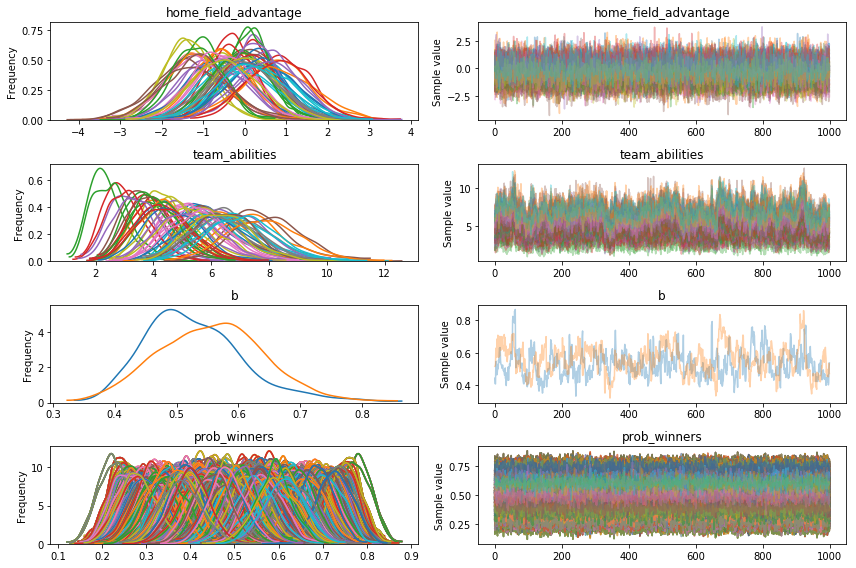

In [19]:
pm.plots.traceplot(trace)

In [20]:
estimated_abilities = trace['team_abilities'].mean(axis=0)
estimated_abilities_error = trace['team_abilities'].std(axis=0)

In [21]:
team_id_lookup = {v: k for k, v in team_ids.items()}

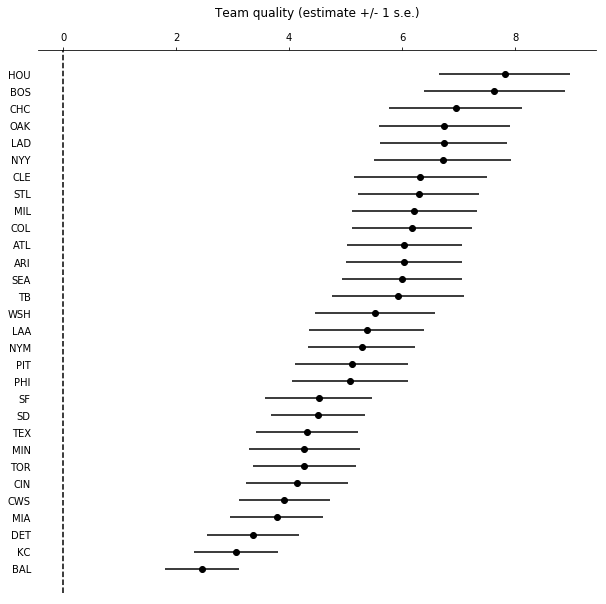

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

# Simulate Outcomes

In [95]:
n = 10_000

def simulate_outcome(team1, team2):
    id1, id2 = team_ids[team1], team_ids[team2]
    advantage = trace['home_field_advantage'][:,id1].T
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sim1, sim2 = np.random.choice(trace1, size=n) + np.random.choice(advantage, size=n), np.random.choice(trace2, size=n)
    denom = sim1 + sim2
    p1, p2 = sim1 / denom, sim2 / denom
    p_home = (p1 > p2).sum() / len(p1)
    return p_home, 1-p_home

In [96]:
simulate_outcome('BOS', 'BAL')

(0.9999, 9.999999999998899e-05)

In [97]:
simulate_outcome('PHI', 'NYM')

(0.5951, 0.40490000000000004)

In [98]:
simulate_outcome('NYM', 'PHI')

(0.2621, 0.7379)

In [99]:
simulate_outcome('PHI', 'BOS')

(0.1444, 0.8556)

In [100]:
simulate_outcome('BOS', 'PHI')

(0.9636, 0.03639999999999999)